In [ ]:
! wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2021-09-14 10:20:59--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.2’

titanic.csv.2       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-09-14 10:20:59 (5.37 MB/s) - ‘titanic.csv.2’ saved [60302/60302]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
females = df.Sex == 'female'
males = df.Sex == 'male'

In [ ]:
df.Survived.corr(females)

0.5433513806577555

In [ ]:
df.Survived.corr(males)

-0.5433513806577555

In [ ]:
for pclass in df.Pclass.unique():
  print("Pclass = ", pclass, " - ", df.Survived.corr(df.Pclass == pclass))

Pclass =  3  -  -0.3223083573729708
Pclass =  1  -  0.28590376778374327
Pclass =  2  -  0.0933485724119293


In [ ]:
df.Survived.corr(df.Fare)

0.2573065223849625

In [ ]:
for bark in df.Embarked.unique():
  print("Embarked = ", bark, " - ", df.Survived.corr(df.Embarked == bark))

Embarked =  S  -  -0.15566027340439306
Embarked =  C  -  0.16824043121823268
Embarked =  Q  -  0.0036503826839719387
Embarked =  nan  -  nan


In [ ]:
df.Survived.corr(df.Age)

-0.07722109457217768

In [ ]:
df.SibSp.corr(df.Survived)

-0.035322498885735645

In [ ]:
df.SibSp.corr(df.Parch)

0.41483769862015557

In [ ]:
df.Survived.corr(females, method="spearman")

0.5433513806577551

In [ ]:
df.Survived.corr(df.Fare, method="spearman")

0.32373613944480834

In [ ]:
df.Survived.corr(df.Age, method="spearman")

-0.052565300044694487

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import scipy

In [ ]:
cat_features = ['Pclass', 'Sex', 'Embarked']
real_features = ['Age', 'SibSp', 'Fare']

In [ ]:
df_cat = df[cat_features].fillna('NAN')
ohe = OneHotEncoder().fit(df_cat)

In [ ]:
X_cat = ohe.transform(df_cat)

In [ ]:
df_real = df[real_features].fillna(0).values
X_real = scipy.sparse.csr.csr_matrix(df_real)

In [ ]:
X = scipy.sparse.hstack((X_real, X_cat))

In [ ]:
all_features = real_features + ohe.get_feature_names(cat_features).tolist()

In [ ]:
all_features

['Age',
 'SibSp',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_NAN',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3434)

In [ ]:
clf = LogisticRegression(random_state=7645, max_iter=1000).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8059701492537313

In [ ]:
sorted(zip(clf.coef_[0], all_features))

[(-1.3119280666221056, 'Sex_male'),
 (-0.999325895119296, 'Pclass_3'),
 (-0.24752354606744514, 'Embarked_S'),
 (-0.2352929036291565, 'SibSp'),
 (-0.01361896472076324, 'Age'),
 (0.003595942174605111, 'Fare'),
 (0.03405696822684393, 'Embarked_Q'),
 (0.07045167057706882, 'Embarked_C'),
 (0.1513257727552013, 'Embarked_NAN'),
 (0.18157831379418407, 'Pclass_2'),
 (0.8260584468169386, 'Pclass_1'),
 (1.3202389321137389, 'Sex_female')]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2, interaction_only=True)
Xq = poly.fit_transform(X)

In [ ]:
all_featuresq = poly.get_feature_names(all_features)
Xq_train, Xq_test, yq_train, yq_test = train_test_split(Xq, y, test_size=0.15, random_state=3434)

In [ ]:
all_featuresq

['1',
 'Age',
 'SibSp',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_NAN',
 'Embarked_Q',
 'Embarked_S',
 'Age SibSp',
 'Age Fare',
 'Age Pclass_1',
 'Age Pclass_2',
 'Age Pclass_3',
 'Age Sex_female',
 'Age Sex_male',
 'Age Embarked_C',
 'Age Embarked_NAN',
 'Age Embarked_Q',
 'Age Embarked_S',
 'SibSp Fare',
 'SibSp Pclass_1',
 'SibSp Pclass_2',
 'SibSp Pclass_3',
 'SibSp Sex_female',
 'SibSp Sex_male',
 'SibSp Embarked_C',
 'SibSp Embarked_NAN',
 'SibSp Embarked_Q',
 'SibSp Embarked_S',
 'Fare Pclass_1',
 'Fare Pclass_2',
 'Fare Pclass_3',
 'Fare Sex_female',
 'Fare Sex_male',
 'Fare Embarked_C',
 'Fare Embarked_NAN',
 'Fare Embarked_Q',
 'Fare Embarked_S',
 'Pclass_1 Pclass_2',
 'Pclass_1 Pclass_3',
 'Pclass_1 Sex_female',
 'Pclass_1 Sex_male',
 'Pclass_1 Embarked_C',
 'Pclass_1 Embarked_NAN',
 'Pclass_1 Embarked_Q',
 'Pclass_1 Embarked_S',
 'Pclass_2 Pclass_3',
 'Pclass_2 Sex_female',
 'Pclass_2 Sex_male',
 'Pclass_2 Embarke

In [ ]:
clfq = LogisticRegression(random_state=7645, max_iter=10000).fit(Xq_train, yq_train)

In [ ]:
clfq.score(Xq_test, yq_test)

0.7910447761194029

In [ ]:
sorted(zip(clfq.coef_[0], all_featuresq))

[(-1.0254212695379594, 'Sex_male'),
 (-0.8215255262649629, 'Pclass_2 Sex_male'),
 (-0.7709693861430915, 'SibSp Pclass_3'),
 (-0.6869785028790615, 'Sex_male Embarked_Q'),
 (-0.5847988917127819, 'Pclass_3'),
 (-0.5158395315412899, 'Pclass_3 Sex_female'),
 (-0.4981574886624135, 'Pclass_3 Embarked_S'),
 (-0.20246482927701748, 'Sex_male Embarked_C'),
 (-0.13597793737940442, 'Sex_male Embarked_S'),
 (-0.13493638310060815, 'Pclass_1 Sex_male'),
 (-0.09922179285287511, 'Pclass_2 Embarked_C'),
 (-0.08902803590279122, 'SibSp Embarked_S'),
 (-0.06895936017124392, 'Pclass_3 Sex_male'),
 (-0.05195150400674979, 'Pclass_3 Embarked_Q'),
 (-0.04484253804916068, 'Age Embarked_Q'),
 (-0.04066679037652837, 'Age Pclass_2'),
 (-0.036700750746267316, 'SibSp Embarked_Q'),
 (-0.0346898990378957, 'Pclass_3 Embarked_C'),
 (-0.01833042283108983, 'Fare Embarked_S'),
 (-0.014220465583918644, 'Age SibSp'),
 (-0.014064826432028946, 'Age'),
 (-0.013741481502797833, 'Fare Embarked_C'),
 (-0.009382689269112744, 'Fare Pc

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clft = DecisionTreeClassifier(random_state=321).fit(X_train, y_train)

In [ ]:
clft.score(X_test, y_test)

0.8059701492537313

In [ ]:
sorted(zip(clft.feature_importances_, all_features))

[(0.0, 'Embarked_NAN'),
 (0.0, 'Sex_female'),
 (0.0004820287188811303, 'Pclass_2'),
 (0.007747243004777778, 'Pclass_1'),
 (0.008476541705339541, 'Embarked_Q'),
 (0.012153550765389558, 'Embarked_C'),
 (0.01831562155176754, 'Embarked_S'),
 (0.04213871960602983, 'SibSp'),
 (0.09139899541904187, 'Pclass_3'),
 (0.2160737112041736, 'Age'),
 (0.29567249937176776, 'Fare'),
 (0.3075410886528313, 'Sex_male')]

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(558.0, 978.48, 'Sex_male <= 0.5\ngini = 0.474\nsamples = 757\nvalue = [464, 293]'),
 Text(279.0, 761.0400000000001, 'Pclass_3 <= 0.5\ngini = 0.385\nsamples = 273\nvalue = [71, 202]'),
 Text(139.5, 543.6, 'Fare <= 29.356\ngini = 0.106\nsamples = 143\nvalue = [8, 135]'),
 Text(69.75, 326.1600000000001, 'Age <= 55.5\ngini = 0.191\nsamples = 56\nvalue = [6, 50]'),
 Text(34.875, 108.72000000000003, '\n  (...)  \n'),
 Text(104.625, 108.72000000000003, '\n  (...)  \n'),
 Text(209.25, 326.1600000000001, 'Fare <= 149.035\ngini = 0.045\nsamples = 87\nvalue = [2, 85]'),
 Text(174.375, 108.72000000000003, '\n  (...)  \n'),
 Text(244.125, 108.72000000000003, '\n  (...)  \n'),
 Text(418.5, 543.6, 'Fare <= 23.35\ngini = 0.5\nsamples = 130\nvalue = [63, 67]'),
 Text(348.75, 326.1600000000001, 'Age <= 16.5\ngini = 0.476\nsamples = 105\nvalue = [41, 64]'),
 Text(313.875, 108.72000000000003, '\n  (...)  \n'),
 Text(383.625, 108.72000000000003, '\n  (...)  \n'),
 Text(488.25, 326.1600000000001, 'Emb

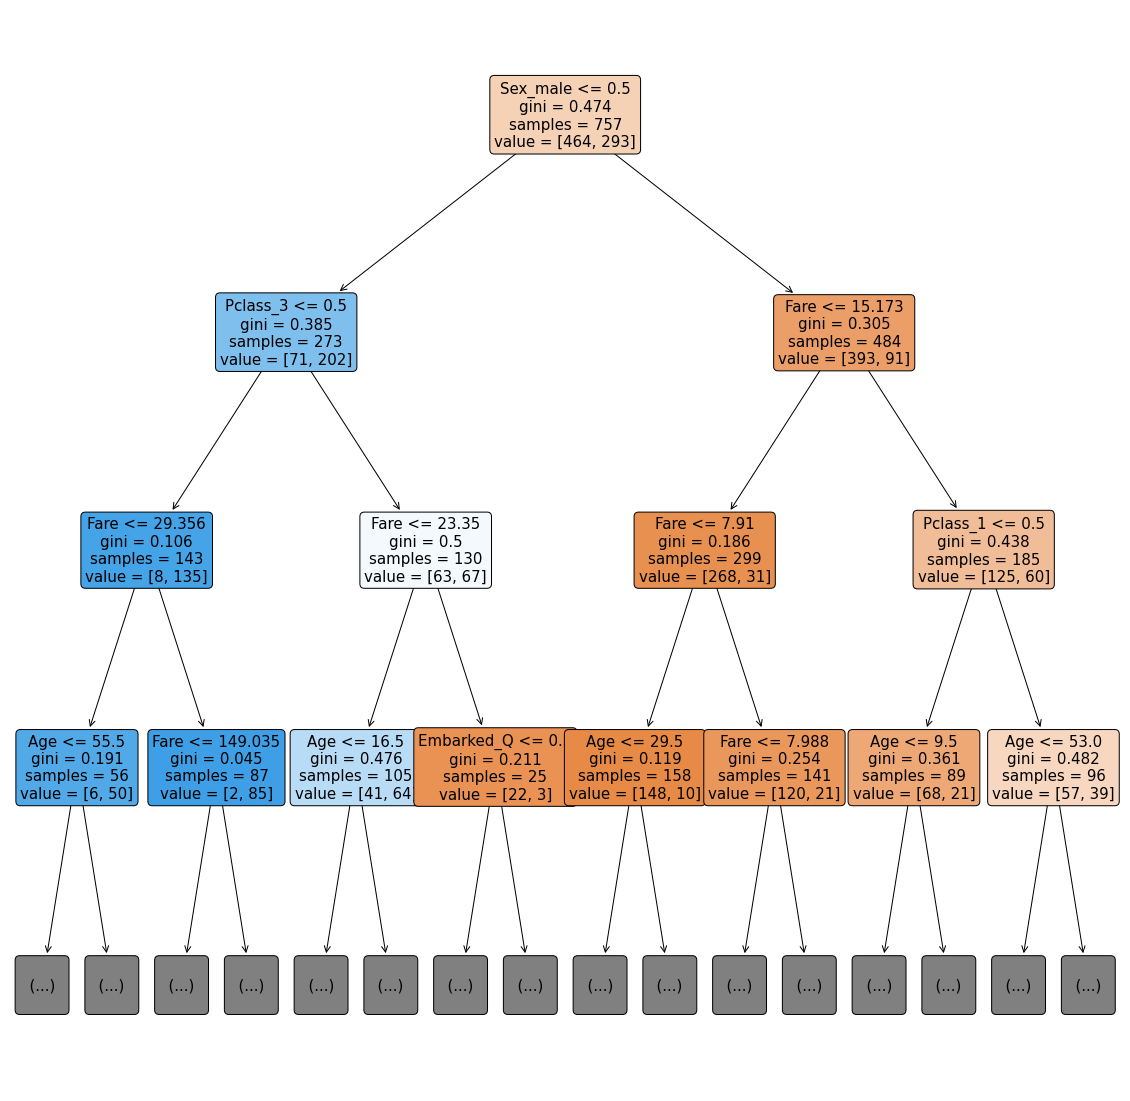

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(clft, max_depth=3, feature_names=all_features, fontsize=15, rounded=True, filled=True)

In [ ]:
feature = clft.tree_.feature
threshold = clft.tree_.threshold

node_indicator = clft.decision_path(X)
leaf_id = clft.apply(X)
predictions = clft.predict(X)

sample_id = 2
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample {id} - prediction = {pred}:\n'.format(id=sample_id, pred=predictions[sample_id]))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              feature=all_features[feature[node_id]],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))

Rules used to predict sample 2 - prediction = 1:

decision node 0 : (X_test[Sex_male] = 0.0) <= 0.5)
decision node 1 : (X_test[Pclass_3] = 1.0) > 0.5)
decision node 35 : (X_test[Fare] = 18.0) <= 23.350000381469727)
decision node 36 : (X_test[Age] = 18.0) > 16.5)
decision node 60 : (X_test[Fare] = 18.0) > 7.700000047683716)
decision node 64 : (X_test[Age] = 18.0) <= 38.0)
decision node 65 : (X_test[Age] = 18.0) <= 32.5)
decision node 66 : (X_test[SibSp] = 2.0) > 0.5)
decision node 67 : (X_test[Fare] = 18.0) > 8.672900199890137)
decision node 68 : (X_test[Age] = 18.0) <= 27.5)
decision node 69 : (X_test[Age] = 18.0) <= 25.5)


In [ ]:
df_X = pd.DataFrame(data=X.toarray(), columns=all_features)

In [ ]:
! pip install shap

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=efc0cc3d8c3fa631bfa96c9ae74d4d918b654b10f287bfff7d0135ac1ddf8f74
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
shap.initjs()

In [ ]:
sh_df = shap.kmeans(df_X, 100).data

In [ ]:
explainer = shap.KernelExplainer(clft.predict_proba, sh_df)
shap_values = explainer.shap_values(sh_df)
shap.force_plot(explainer.expected_value[0], shap_values[0], sh_df)

  0%|          | 0/100 [00:00<?, ?it/s]

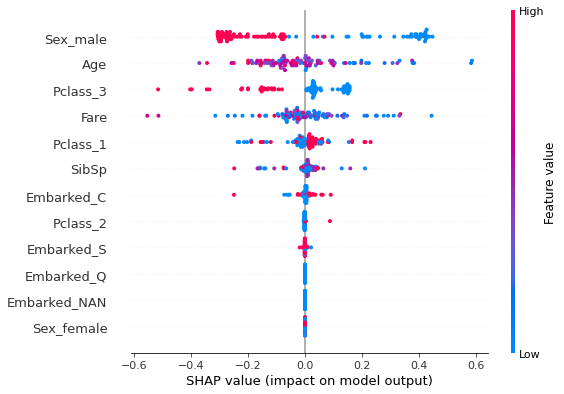

In [ ]:
shap.summary_plot(shap_values[1], sh_df, feature_names=all_features)

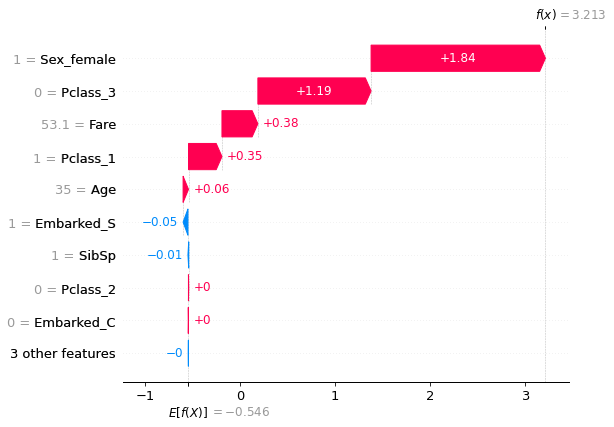

In [ ]:
import xgboost
import shap

model = xgboost.XGBClassifier().fit(X_train.toarray(), y_train)

explainer = shap.Explainer(model, feature_names=all_features)
shap_values = explainer(X.toarray())

shap.plots.waterfall(shap_values[3])

https://slundberg.github.io/shap/notebooks/ImageNet%20VGG16%20Model%20with%20Keras.html

https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet%20%28PyTorch%29.html

https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html